In [1]:
# modules import
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
# Open data
# file paths
netCDF_NEMO_fileT = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_TEMP.nc'
netCDF_NEMO_fileP = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_PREC.nc'
netCDF_NEMO_fileW = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_WIND.nc'
netCDF_NEMO_fileWC = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_REV_WC.nc'
general_path = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf'

# open files
SBCT = xr.open_mfdataset(netCDF_NEMO_fileT)
SBCP = xr.open_mfdataset(netCDF_NEMO_fileP)
SBCW = xr.open_mfdataset(netCDF_NEMO_fileW)
SBCWC = xr.open_mfdataset(netCDF_NEMO_fileWC)

# saved file path
saved_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/monthly_melt_ART_REV_WC.pdf'

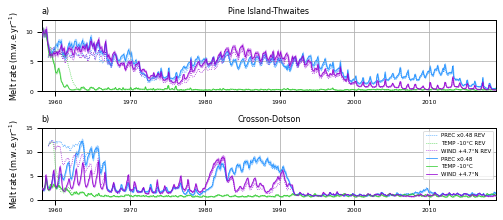

In [4]:
sns.set_context('paper')

# surface of iceshelves
SThwaites = 4650261338.879133
SPineIsland = 6362318976.695184
SCrosson = 4898138142.642234
SDotson = 5024151800.130805

# figure
f = plt.figure(figsize = (7.08, 3.15))
ax={}
nb_rows = 2
nb_cols = 1
# add label and colorbar
b = ['PREC x0.48 REV', 'TEMP -10°C REV', 'WIND +4.7°N REV', 'PREC x0.48', 'TEMP -10°C', 'WIND +4.7°N']
colors = ['dodgerblue', 'limegreen', 'darkviolet', 'dodgerblue', 'limegreen', 'darkviolet']
x = [datetime.date(1958, 3, 1), datetime.date(2019, 1, 1)] 
k = 0
i = 6
netCDF_NEMO_file = f"{general_path}/NETCDF_MELT_PTCD_REV_WC.nc"
SBC = xr.open_mfdataset(netCDF_NEMO_file)
SBC['year']=SBC.time.dt.year
for l in np.arange(0, SBC['iceshelf'].size, 1):
    k=k+1
    ax[k] = f.add_subplot(nb_rows,nb_cols, k)
    SBCselect = SBC.melt[l, :, :]
    for j in np.arange(0, SBC['num'].size, 1):
        SBC0 = SBCselect[:, j]
        
        if k==1:
            ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland), linewidth = 0.75, linestyle = ':', color= colors[j], label = b[j]) 
            ax[k].set_title('Pine Island-Thwaites', fontsize=8)
            ax[k].set_title('a)', fontsize=8, loc='left')
            ax[k].set_ylim(0,12)
            
        if k==2:
            i=i+1
            ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SCrosson + SDotson), linewidth = 0.75, linestyle = ':', color= colors[j], label = b[j], zorder=i) 
            ax[k].set_title('Crosson-Dotson', fontsize=8)
            ax[k].set_title('b)', fontsize=8, loc='left')
            ax[k].set_ylim(0,15) 
            
        if j==2 :
            ax[k].plot(SBCP.time, SBCP.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson), linewidth = 0.75, color= colors[3], label = b[3], zorder=1)
            ax[k].fill_between(SBCP.time, SBCP.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson) * 0.95, SBCP.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson) * 1.05, color= colors[3], alpha=0.3, zorder=2)
            ax[k].plot(SBCT.time, SBCT.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson), linewidth = 0.75, color= colors[4], label = b[4], zorder=3)
            ax[k].fill_between(SBCT.time, SBCT.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson) * 0.95, SBCT.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson) * 1.05, color= colors[4], alpha=0.3, zorder=4)
            ax[k].plot(SBCW.time, SBCW.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson), linewidth = 0.75, color= colors[5], label = b[5], zorder=5)
            ax[k].fill_between(SBCW.time, SBCW.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson) * 0.95, SBCW.melt[l,:,0] * 10**12 / 1000 / (SCrosson + SDotson) * 1.05, color= colors[5], alpha=0.3, zorder=6)
            if k==2:
                ax[k].legend(loc='upper right', prop={"size":5.5})
        ax[k].set_ylabel('Melt rate (m.w.e.yr$^{-1}$)', fontsize=8)
        ax[k].set_xlim(x[0], x[1])
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.grid(True)
        
        plt.tight_layout()
# saved file
plt.savefig(saved_file)